# Import Libraries and Load Dataset

In [1]:
pip install sqlalchemy mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv 


load_dotenv(dotenv_path="/Users/deepakveerelli/.env")

DB_HOST = os.getenv('DB_HOST')
DB_DATABASE = os.getenv('DB_DATABASE')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')

print(f"Attempting to connect with: Host={DB_HOST}, User={DB_USER}, Database={DB_DATABASE}") # For debugging

try:
    engine = create_engine(f"mysql+mysqlconnector://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_DATABASE}")
    print("SQLAlchemy engine created successfully.")
except Exception as e:
    print(f"Error creating SQLAlchemy engine: {e}")
    print(f"Check your .env file. DB_HOST: {DB_HOST}, DB_USER: {DB_USER}, DB_PASSWORD: {'*' * len(DB_PASSWORD) if DB_PASSWORD else 'None'}, DB_DATABASE: {DB_DATABASE}")
    exit()

# Read customers table
print("\n customers table:")
df_customers = pd.read_sql("SELECT * FROM customers", engine)

print(df_customers.head())
# Read services table
print("\nservices table:")
df_services = pd.read_sql("SELECT * FROM services", engine)
print(df_services.head())

# Read billing table
print("\n billing table:")
df_billing = pd.read_sql("SELECT * FROM billing", engine)
print(df_billing.head())

# Read churn_info table
print("\n churn_info table:")
df_churn_info = pd.read_sql("SELECT * FROM churn_info", engine)
print(df_churn_info.head())

Attempting to connect with: Host=localhost, User=root, Database=telecom
SQLAlchemy engine created successfully.

 customers table:
   customerID  gender  SeniorCitizen Partner
0  0002-ORFBO  Female              0     Yes
1  0003-MKNFE    Male              0      No
2  0004-TLHLJ    Male              0      No
3  0011-IGKFF    Male              1     Yes
4  0013-EXCHZ  Female              1     Yes

services table:
   customerID PhoneService InternetService
0  7590-VHVEG           No             DSL
1  5575-GNVDE          Yes             DSL
2  3668-QPYBK          Yes             DSL
3  7795-CFOCW           No             DSL
4  9237-HQITU          Yes     Fiber optic

 billing table:
   customerID        Contract  MonthlyCharges  tenure
0  7590-VHVEG  Month-to-month           29.85       1
1  5575-GNVDE        One year           56.95      34
2  3668-QPYBK  Month-to-month           53.85       2
3  7795-CFOCW        One year           42.30      45
4  9237-HQITU  Month-to-month        

# Data Refinement & Rule-Based Customer Profiling

In [3]:
df_telecom = df_customers.merge(df_services, on='customerID', how='left') \
                        .merge(df_billing, on='customerID', how='left') \
                        .merge(df_churn_info, on='customerID', how='left')

df_telecom.head().style.hide(axis='index')


customerID,gender,SeniorCitizen,Partner,PhoneService,InternetService,Contract,MonthlyCharges,tenure,Churn
0002-ORFBO,Female,0,Yes,Yes,DSL,One year,65.600000,9,No
0003-MKNFE,Male,0,No,Yes,DSL,Month-to-month,59.900000,9,No
0004-TLHLJ,Male,0,No,Yes,Fiber optic,Month-to-month,73.900000,4,Yes
0011-IGKFF,Male,1,Yes,Yes,Fiber optic,Month-to-month,98.000000,13,Yes
0013-EXCHZ,Female,1,Yes,Yes,Fiber optic,Month-to-month,83.900000,3,Yes


In [4]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7032 non-null   object 
 1   gender           7032 non-null   object 
 2   SeniorCitizen    7032 non-null   int64  
 3   Partner          7032 non-null   object 
 4   PhoneService     7032 non-null   object 
 5   InternetService  7032 non-null   object 
 6   Contract         7032 non-null   object 
 7   MonthlyCharges   7032 non-null   float64
 8   tenure           7032 non-null   int64  
 9   Churn            7032 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 549.5+ KB


In [5]:
df_telecom.shape

(7032, 10)

In [6]:
df_telecom.describe()

,SeniorCitizen,MonthlyCharges,tenure
count,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,32.421786
std,0.368844,30.085974,24.545260
min,0.000000,18.250000,1.000000
25%,0.000000,35.587500,9.000000
50%,0.000000,70.350000,29.000000
75%,0.000000,89.862500,55.000000
max,1.000000,118.750000,72.000000


In [7]:
df_telecom.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
PhoneService       0
InternetService    0
Contract           0
MonthlyCharges     0
tenure             0
Churn              0
dtype: int64

In [8]:
df_telecom.nunique()

customerID         7032
gender                2
SeniorCitizen         2
Partner               2
PhoneService          2
InternetService       3
Contract              3
MonthlyCharges     1584
tenure               72
Churn                 2
dtype: int64

# Exploratory Data Analysis (EDA)

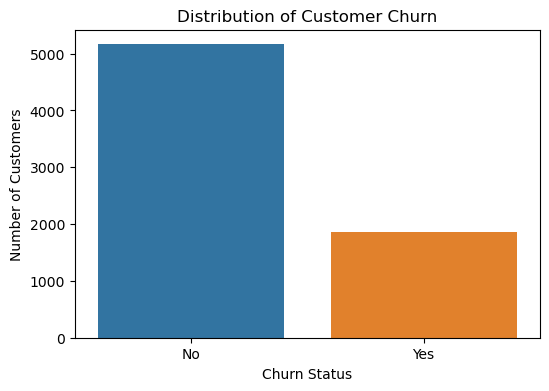

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_telecom, x='Churn')
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

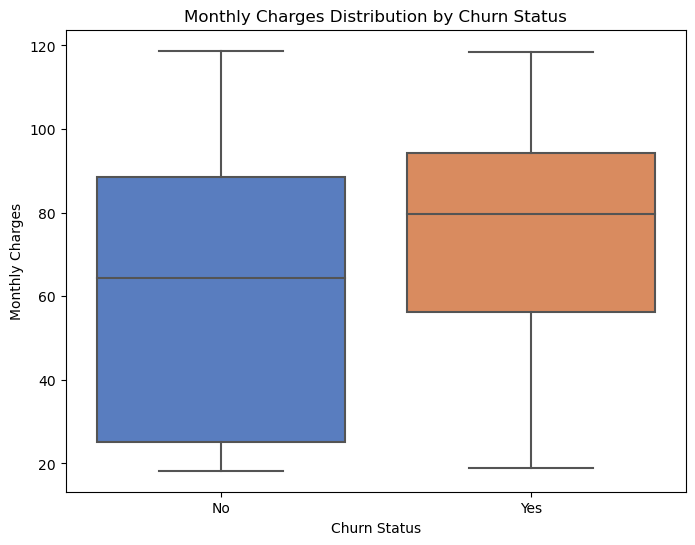

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_telecom, x='Churn', y='MonthlyCharges', palette='muted')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.show()


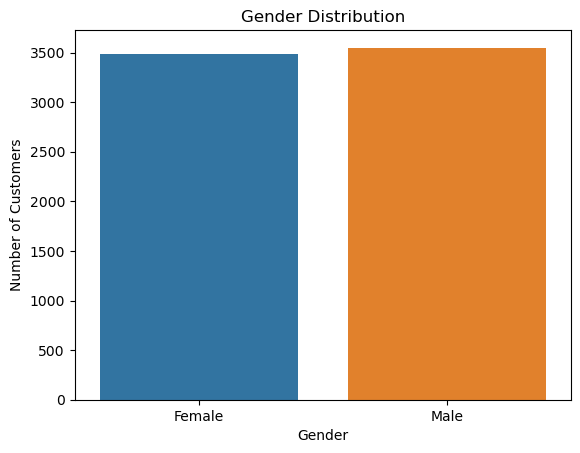

In [11]:
sns.countplot(data=df_telecom, x='gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()


Text(0.5, 1.0, 'Churn by Contract Type')

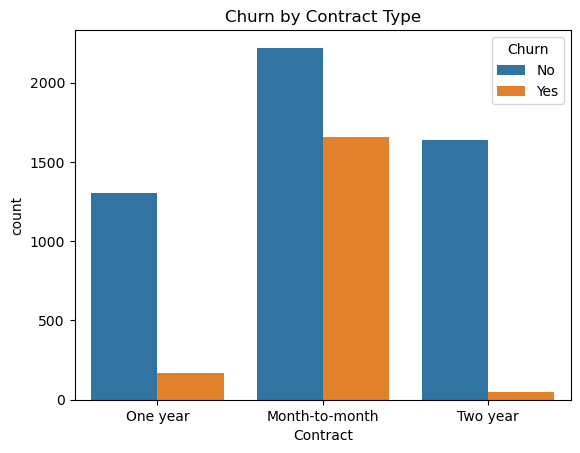

In [12]:
sns.countplot(x='Contract', hue='Churn', data=df_telecom)
plt.title("Churn by Contract Type")




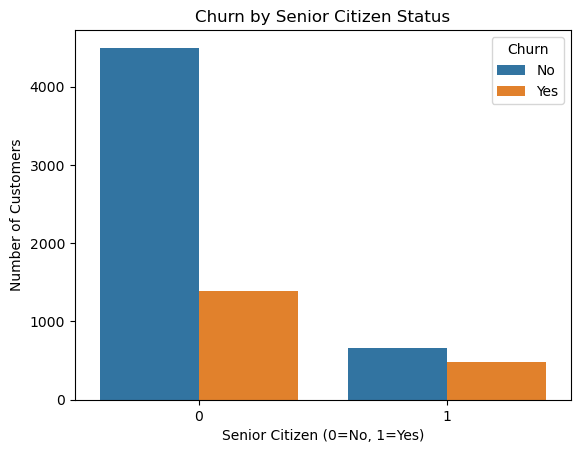

In [13]:

sns.countplot(data=df_telecom, x='SeniorCitizen', hue='Churn')
plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen (0=No, 1=Yes)")
plt.ylabel("Number of Customers")
plt.legend(title='Churn')
plt.show()


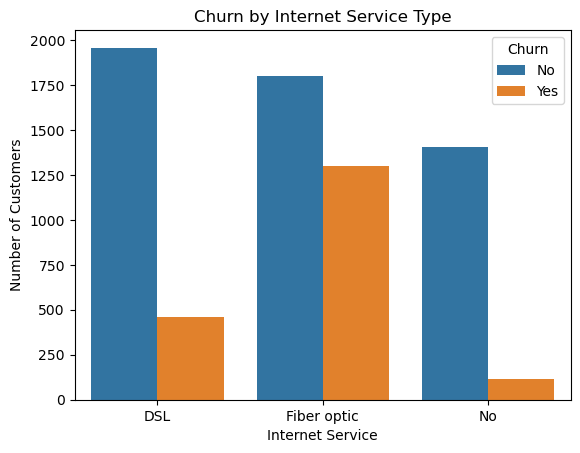

In [14]:
sns.countplot(data=df_telecom, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.show()


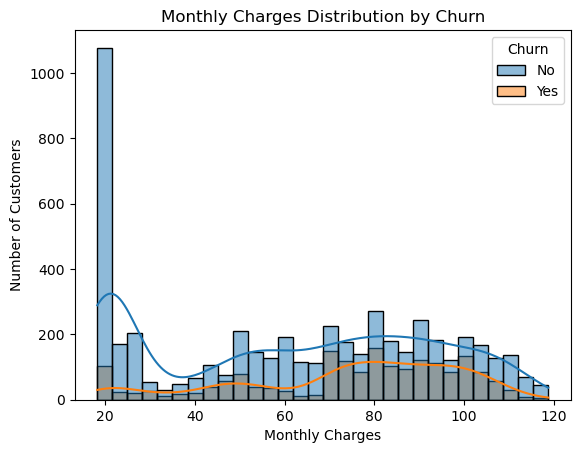

In [15]:
sns.histplot(data=df_telecom, x='MonthlyCharges', bins=30, kde=True, hue='Churn')
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()


# Statistical modeling


In [16]:
# Encode Categorical Variables & Split Data

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_telecom.select_dtypes(include="object").columns:
    if col != "customerID":
        df_telecom[col] = le.fit_transform(df_telecom[col])

In [18]:
from sklearn.model_selection import train_test_split

X = df_telecom.drop(columns=["customerID", "Churn"])
y =df_telecom["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
#Logistic Regression Model Training & Evaluation

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


log_pred = log_model.predict(X_test)


print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))


--- Logistic Regression ---
Accuracy: 0.7882018479033405
Confusion Matrix:
 [[928 105]
 [193 181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [21]:
# Random Forest Model Training & Evaluation

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [23]:
print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))



--- Random Forest ---
Accuracy: 0.7533759772565742
Confusion Matrix:
 [[891 142]
 [205 169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1033
           1       0.54      0.45      0.49       374

    accuracy                           0.75      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.74      0.75      0.75      1407



In [24]:
# XGBoost Model Training & Evaluation

In [25]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\n--- XGBoost ---")
print("Accuracy:", round(accuracy_score(y_test, xgb_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))



--- XGBoost ---
Accuracy: 0.7768
Confusion Matrix:
 [[913 120]
 [194 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [26]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n--- XGBoost Feature Importance ---")
print(feature_importance)


--- XGBoost Feature Importance ---
           Feature  Importance
5         Contract    0.591208
4  InternetService    0.166716
7           tenure    0.049968
1    SeniorCitizen    0.049359
3     PhoneService    0.043535
6   MonthlyCharges    0.043146
0           gender    0.028127
2          Partner    0.027941
